Abbiamo parlato nel corso base di underfitting e overfitting (fai vedere schema)
- underfitting vuol dire che il modello non apprende a sufficienza (basso train, basso test)
- overfitting vuol dire che il modello apprende troppo senza generalizzare (alto train, basso test)

La regolarizzazione è un'insieme di tecniche che permette di prevenire l'overfitting

Vediamo come farlo in particolare per 2 tecniche che sono potentissime ma tendono all'overfitting: alberi e reti neurali.

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor

C:\Users\Piero\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [47]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

In [48]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [49]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Tree

### Profondità dell'albero
Approfondiremo questo aspetto nei video successivi
- sia aper fare più esperimenti con gli stessi iperparametri (cross_validation)
- sia per esplorare gli iperparametri (grid_search)
- nel frattempo una demo veloce

In [34]:
model_overfitted = DecisionTreeRegressor(max_depth=1000)
model_overfitted.fit(X_train, y_train)

train_acc = model_overfitted.score(X_train, y_train)
test_acc = model_overfitted.score(X_test, y_test)

train_acc, test_acc

(1.0, 0.6106695054464031)

In [38]:
# per adesso a mano, più in là nel corso con la grid search

results = []

for depth in range(1, 30):
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train, y_train)
    
    results.append({
        'train': model.score(X_train, y_train),
        'test' : model.score(X_test, y_test)
    })

results

[{'train': 0.309677707160087, 'test': 0.309842432855323},
 {'train': 0.44802094552686444, 'test': 0.4426626299601194},
 {'train': 0.5354150348931558, 'test': 0.5233644576485253},
 {'train': 0.5860781469464467, 'test': 0.5792724676105434},
 {'train': 0.6397297408632434, 'test': 0.6299580439397111},
 {'train': 0.6860629765551634, 'test': 0.668392555239836},
 {'train': 0.7264427836509177, 'test': 0.6948741606425981},
 {'train': 0.7716382839246155, 'test': 0.7073845595747859},
 {'train': 0.8092385645340466, 'test': 0.7060321807165284},
 {'train': 0.8437509509863241, 'test': 0.6966435704524983},
 {'train': 0.8777769414830772, 'test': 0.7005801173362287},
 {'train': 0.9056297151862847, 'test': 0.6777518327244534},
 {'train': 0.9297491566967448, 'test': 0.6708067347386271},
 {'train': 0.9499872698453266, 'test': 0.6577495893135494},
 {'train': 0.9646521051314702, 'test': 0.6468011482221099},
 {'train': 0.9759209546417565, 'test': 0.6369521014842249},
 {'train': 0.983964406680594, 'test': 0.63

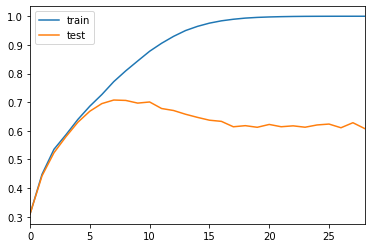

In [40]:
pd.DataFrame(results).plot()

### Ensembling

- un modo di tenere a bada l'overfitting dell'albero è metterne diversi a votazione
- approfondiremo con una sezione tutta sull'ensembling

In [43]:
forest = RandomForestRegressor(n_estimators=100, max_depth=15)
forest.fit(X_train, y_train)

acc_train = forest.score(X_train, y_train)
acc_test = forest.score(X_test, y_test)

acc_train, acc_test

# esercizio: trova il numero di alberi e la profondità ottimale (rifallo con la grid)

(0.9569824650577888, 0.8041666416027987)

# Neural Net

- **Early stopping**
    Fermiamo l'apprendimento prima che la rete possa overfittare
- **L1 e L2**
    Facciamo in modo che i pesi della rete rimangano bassi, penalizzando pesi alti
-  **dropout** Spegniamo a caso dei neuroni durante la fase di apprendimento per fare in modo che nessuno si specializzi su un certo record
- non ci sono regole, bisogna fare esperimenti!

In [69]:
results = []

for architecture in [ [20], [50], [100] ]:
    
    print(f'Architecture {architecture}')
    
    models = {
        'default'    : MLPRegressor(hidden_layer_sizes=architecture, max_iter=10000),
        'early_stop' : MLPRegressor(hidden_layer_sizes=architecture, max_iter=1000),
        'L2'         : MLPRegressor(hidden_layer_sizes=architecture, alpha=0.03),
    }
    
    for name, net in models.items():
        net.fit(X_train, y_train)
        
        results.append({
            'train': net.score(X_train, y_train),
            'test' : net.score(X_test, y_test),
            'architecture': str(architecture),
            'name' : name
        })
    
results

Architecture [20]
Architecture [50]
Architecture [100]


[{'train': 0.3691135757431462,
  'test': 0.3876812388780758,
  'architecture': '[20]',
  'name': 'default'},
 {'train': 0.38199272693283526,
  'test': 0.37939728492821834,
  'architecture': '[20]',
  'name': 'early_stop'},
 {'train': 0.48018853732682076,
  'test': 0.5047521816353941,
  'architecture': '[20]',
  'name': 'L2'},
 {'train': 0.5355459898164465,
  'test': 0.5256379126644336,
  'architecture': '[50]',
  'name': 'default'},
 {'train': 0.5790293885878988,
  'test': 0.5746879975669654,
  'architecture': '[50]',
  'name': 'early_stop'},
 {'train': 0.08509614387061881,
  'test': 0.07552285498659561,
  'architecture': '[50]',
  'name': 'L2'},
 {'train': 0.5278087717439128,
  'test': 0.5202403408384233,
  'architecture': '[100]',
  'name': 'default'},
 {'train': 0.26612201527361434,
  'test': 0.2599590695509265,
  'architecture': '[100]',
  'name': 'early_stop'},
 {'train': -0.39279874480024746,
  'test': -0.38905363688525885,
  'architecture': '[100]',
  'name': 'L2'}]

In [74]:
df = pd.DataFrame(results)
df

,train,test,architecture,name
0,0.369114,0.387681,[20],default
1,0.381993,0.379397,[20],early_stop
2,0.480189,0.504752,[20],L2
3,0.535546,0.525638,[50],default
4,0.579029,0.574688,[50],early_stop
5,0.085096,0.075523,[50],L2
6,0.527809,0.520240,[100],default
7,0.266122,0.259959,[100],early_stop
8,-0.392799,-0.389054,[100],L2


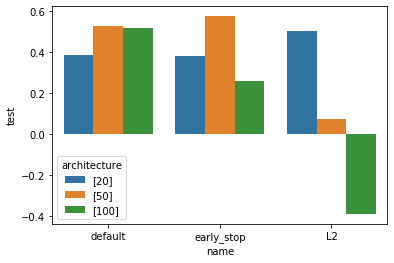

In [75]:
sns.barplot(data=df, x='name', y='test', hue='architecture')